# Import data and libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression, SGDClassifier
import pickle
import scripts.plotters


tree_data = pd.read_csv('../data/covtype.data', header=None)
tree_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_To_Hydrology',
             'Vertical_To_Hydrology', 'Horizontal_To_Roadways',
             'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
             'Horizontal_To_Fire'] + \
            [f'Wilderness_Area_{i}' for i in range(4)] + \
            [f'Soil_Type_{i}' for i in range(40)] + \
            ['Cover_Type']

# print(tree_data.describe())
tree_data.columns = tree_cols
print("Nan values in dataset:", tree_data.isna().sum().sum())
print(tree_data.head())

2025-12-02 19:48:52.039637: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-02 19:48:52.063695: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-02 19:48:53.079875: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Nan values in dataset: 0
   Elevation  Aspect  Slope  Horizontal_To_Hydrology  Vertical_To_Hydrology  \
0       2596      51      3                      258                      0   
1       2590      56      2                      212                     -6   
2       2804     139      9                      268                     65   
3       2785     155     18                      242                    118   
4       2595      45      2                      153                     -1   

   Horizontal_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                     510            221             232            148   
1                     390            220             235            151   
2                    3180            234             238            135   
3                    3090            238             238            122   
4                     391            220             234            150   

   Horizontal_To_Fire  ...  Soil_Type_31  Soil_Ty

## Split training/testing data

In [3]:
x_tree = tree_data.drop('Cover_Type', axis=1)
y_tree = tree_data['Cover_Type']

x_train, x_test, y_train, y_test = train_test_split(x_tree, y_tree, test_size=0.2)


x_underSampled, y_underSampled = RandomUnderSampler(random_state=42, sampling_strategy='majority').fit_resample(x_train, y_train)
x_underSampled2, y_underSampled2 = RandomUnderSampler(random_state=42, sampling_strategy='majority').fit_resample(x_train, y_train)
x_even, y_even = SMOTE(random_state=42, sampling_strategy="minority", k_neighbors=2).fit_resample(x_train, y_train)

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_underSampled = x_underSampled.to_numpy()
y_underSampled = y_underSampled.to_numpy()

x_underSampled2 = x_underSampled2.to_numpy()
y_underSampled2 = y_underSampled2.to_numpy()

x_even = x_even.to_numpy()
y_even = y_even.to_numpy()

data = tree_data.to_numpy()

## Class Distribution

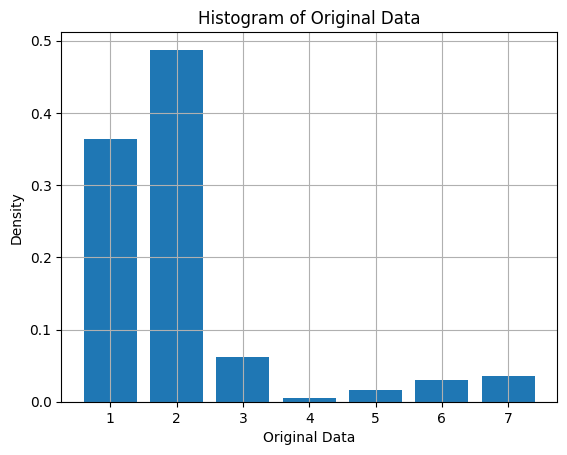

In [4]:
scripts.plot_histogram(y_tree, label='Original Data')

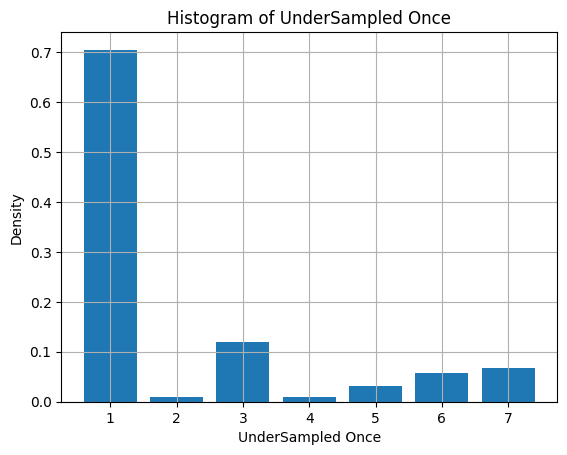

In [5]:
scripts.plot_histogram(pd.Series(y_underSampled), label='UnderSampled Once')

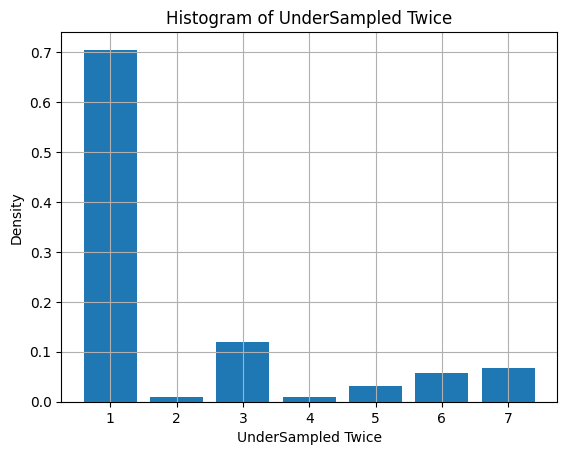

In [6]:
scripts.plot_histogram(pd.Series(y_underSampled2), label='UnderSampled Twice')

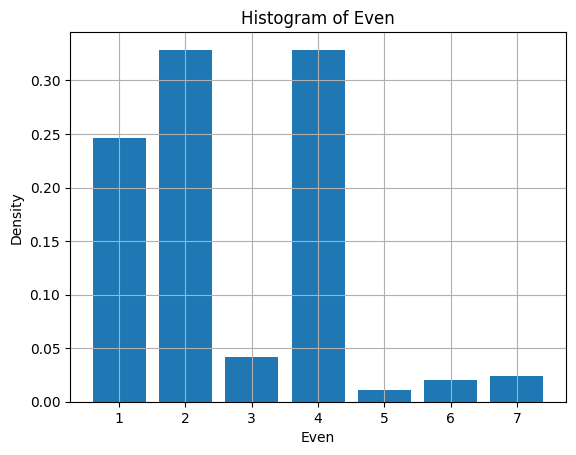

In [7]:
scripts.plot_histogram(pd.Series(y_even), label='Even')

## Scaling Dataset

In [8]:
scalar = StandardScaler()

scaled = scalar.fit_transform(x_underSampled[:, :10])

dataScaled = np.concatenate((scaled, x_underSampled[:,10:54]), axis=1)

x_Scaled_train, x_Scaled_test, y_Scaled_train, y_Scaled_test = train_test_split(dataScaled, y_underSampled.reshape(-1, 1), test_size=0.2)

x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(dataScaled, y_underSampled.reshape(-1, 1), test_size=0.2)

In [9]:
scalar = StandardScaler()

scaled = scalar.fit_transform(x_train[:, :10])

dataScaled = np.concatenate((scaled, x_train[:,10:54]), axis=1)

x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(dataScaled, y_train.reshape(-1, 1), test_size=0.2)

In [10]:
scalar = StandardScaler()

scaled = scalar.fit_transform(x_underSampled[:, :10])

dataScaled = np.concatenate((scaled, x_underSampled[:,10:54]), axis=1)

x_underSampled_train_scaled, x_underSampled_test_scaled, y_underSampled_train_scaled, y_underSampled_test_scaled = train_test_split(dataScaled, y_underSampled.reshape(-1, 1), test_size=0.2)

In [11]:
scalar = StandardScaler()

scaled = scalar.fit_transform(x_underSampled2[:, :10])

dataScaled = np.concatenate((scaled, x_underSampled2[:,10:54]), axis=1)

x_underSampled2_train_scaled, x_underSampled2_test_scaled, y_underSampled2_train_scaled, y_underSampled2_test_scaled = train_test_split(dataScaled, y_underSampled2.reshape(-1, 1), test_size=0.2)

In [12]:
scalar = StandardScaler()

scaled = scalar.fit_transform(x_even[:, :10])

dataScaled = np.concatenate((scaled, x_even[:,10:54]), axis=1)

x_even_train_scaled, x_even_test_scaled, y_even_train_scaled, y_even_test_scaled = train_test_split(dataScaled, y_even.reshape(-1, 1), test_size=0.2)

## Mini Batch Gradient Descent with balanced class weights

In [13]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')

clf.fit(x_Scaled_train, y_Scaled_train.ravel())

print("Z Scaled Test Accuracy: ",clf.score(x_Scaled_test, y_Scaled_test))

Z Scaled Test Accuracy:  0.675077550850457


## Mini Batch Gradient Descent

In [14]:
clf = LogisticRegression(max_iter=1000)

clf.fit(x_Scaled_train, y_Scaled_train.ravel())

print("Z Scaled Test Accuracy: ",clf.score(x_Scaled_test, y_Scaled_test))

Z Scaled Test Accuracy:  0.8733370807569796


## Stochastic Gradient Descent with balanced class weights

In [15]:
clf = SGDClassifier(max_iter=1000, class_weight='balanced')

clf.fit(x_Scaled_train, y_Scaled_train.ravel())

print("Z Scaled Test Accuracy: ",clf.score(x_Scaled_test, y_Scaled_test))

Z Scaled Test Accuracy:  0.8288884725084837


## Stochastic Gradient Descent

In [16]:
clf = SGDClassifier(max_iter=1000)

clf.fit(x_Scaled_train, y_Scaled_train.ravel())

print("Z Scaled Test Accuracy: ",clf.score(x_Scaled_test, y_Scaled_test))

Z Scaled Test Accuracy:  0.8524556034393022


## GridSearch with balanced class weights

In [17]:
mcc_scorer = make_scorer(matthews_corrcoef, greater_is_better=True)
param_grid_LR = {"penalty": ['l2', 'l1', 'elasticnet'], \
"C": [1.0, 0.75, 0.5, 0.25, 0], "max_iter": [1000, 2000]}

param_grid_SGD = {"penalty": ['l2', 'l1', 'elasticnet'], "max_iter": [1000, 2000]}

model_LRB = LogisticRegression(class_weight='balanced')
model_SGDB = SGDClassifier(class_weight='balanced')
model_LR = LogisticRegression()
model_SGD = SGDClassifier()

In [18]:
# Orginal Data
grid_searchLRB = GridSearchCV(model_LRB, param_grid_LR, cv=3, scoring=mcc_scorer, verbose=10)
grid_searchSGDB = GridSearchCV(model_SGDB, param_grid_SGD, cv=3, scoring=mcc_scorer, verbose=10)

grid_searchLRB.fit(x_train_scaled, y_train_scaled.ravel())
grid_searchSGDB.fit(x_train_scaled, y_train_scaled.ravel())

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 1/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.445 total time=  12.4s
[CV 2/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 2/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.443 total time=  13.2s
[CV 3/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 3/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.446 total time=  15.3s
[CV 1/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 1/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 2/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 3/3; 2/30] END C=1.0, max_it

/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
66 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1218, in fit
    so

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 1/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.447 total time=   5.9s
[CV 2/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 2/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.415 total time=   5.9s
[CV 3/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 3/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.425 total time=   6.9s
[CV 1/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 1/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.399 total time=   7.6s
[CV 2/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 2/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.405 total time=   6.1s
[CV 3/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 3/3; 2/6] END ....max_iter=1000, penalty=l1;,

,estimator,SGDClassifier...ht='balanced')
,param_grid,"{'max_iter': [1000, 2000], 'penalty': ['l2', 'l1', ...]}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,None
,refit,True
,cv,3
,verbose,10
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'hinge'


In [19]:
# Under Sampled Once
grid_searchLRB_1 = GridSearchCV(model_LRB, param_grid_LR, cv=3, scoring=mcc_scorer, verbose=10)
grid_searchSGDB_1 = GridSearchCV(model_SGDB, param_grid_SGD, cv=3, scoring=mcc_scorer, verbose=10)

grid_searchLRB_1.fit(x_underSampled_train_scaled, y_underSampled_train_scaled.ravel())
grid_searchSGDB_1.fit(x_underSampled_train_scaled, y_underSampled_train_scaled.ravel())

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 1/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.524 total time=   7.6s
[CV 2/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 2/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.524 total time=   6.7s
[CV 3/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 3/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.525 total time=   6.7s
[CV 1/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 1/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 2/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 3/3; 2/30] END C=1.0, max_it

/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
66 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1218, in fit
    so

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 1/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.638 total time=   2.5s
[CV 2/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 2/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.651 total time=   2.6s
[CV 3/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 3/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.652 total time=   2.4s
[CV 1/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 1/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.662 total time=   3.9s
[CV 2/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 2/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.651 total time=   3.5s
[CV 3/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 3/3; 2/6] END ....max_iter=1000, penalty=l1;,

,estimator,SGDClassifier...ht='balanced')
,param_grid,"{'max_iter': [1000, 2000], 'penalty': ['l2', 'l1', ...]}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,None
,refit,True
,cv,3
,verbose,10
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'hinge'


In [20]:
# UnderSampled Twice
grid_searchLRB_2 = GridSearchCV(model_LRB, param_grid_LR, cv=3, scoring=mcc_scorer, verbose=10)
grid_searchSGDB_2 = GridSearchCV(model_SGDB, param_grid_SGD, cv=3, scoring=mcc_scorer, verbose=10)

grid_searchLRB_2.fit(x_underSampled2_train_scaled, y_underSampled2_train_scaled.ravel())
grid_searchSGDB_2.fit(x_underSampled2_train_scaled, y_underSampled2_train_scaled.ravel())

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 1/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.520 total time=   6.8s
[CV 2/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 2/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.523 total time=   6.9s
[CV 3/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 3/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.529 total time=   8.6s
[CV 1/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 1/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 2/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 3/3; 2/30] END C=1.0, max_it

/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
66 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1218, in fit
    so

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 1/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.657 total time=   2.5s
[CV 2/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 2/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.642 total time=   2.7s
[CV 3/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 3/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.636 total time=   2.5s
[CV 1/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 1/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.666 total time=   3.7s
[CV 2/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 2/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.656 total time=   3.9s
[CV 3/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 3/3; 2/6] END ....max_iter=1000, penalty=l1;,

,estimator,SGDClassifier...ht='balanced')
,param_grid,"{'max_iter': [1000, 2000], 'penalty': ['l2', 'l1', ...]}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,None
,refit,True
,cv,3
,verbose,10
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'hinge'


In [21]:
# Even
grid_searchLRB_even = GridSearchCV(model_LRB, param_grid_LR, cv=3, scoring=mcc_scorer, verbose=10)
grid_searchSGDB_even = GridSearchCV(model_SGDB, param_grid_SGD, cv=3, scoring=mcc_scorer, verbose=10)

grid_searchLRB_even.fit(x_even_train_scaled, y_even_train_scaled.ravel())
grid_searchSGDB_even.fit(x_even_train_scaled, y_even_train_scaled.ravel())

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 1/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.610 total time=  14.8s
[CV 2/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 2/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.608 total time=  17.2s
[CV 3/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 3/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.610 total time=  14.4s
[CV 1/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 1/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 2/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 3/3; 2/30] END C=1.0, max_it

/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
66 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1218, in fit
    so

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 1/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.681 total time=   4.8s
[CV 2/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 2/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.676 total time=   4.7s
[CV 3/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 3/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.677 total time=   4.7s
[CV 1/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 1/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.685 total time=  13.7s
[CV 2/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 2/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.673 total time=  10.4s
[CV 3/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 3/3; 2/6] END ....max_iter=1000, penalty=l1;,

,estimator,SGDClassifier...ht='balanced')
,param_grid,"{'max_iter': [1000, 2000], 'penalty': ['l2', 'l1', ...]}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,None
,refit,True
,cv,3
,verbose,10
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'hinge'


## Best Models from Grid Search

In [22]:
print("Original Data: ", grid_searchLRB.best_params_, grid_searchLRB.best_score_)
print("Original Data: ", grid_searchSGDB.best_params_, grid_searchSGDB.best_score_)
print("UnderSampled Once: ", grid_searchLRB_1.best_params_, grid_searchLRB_1.best_score_)
print("UnderSampled Once: ", grid_searchSGDB_1.best_params_, grid_searchSGDB_1.best_score_)
print("UnderSampled Twice: ", grid_searchLRB_2.best_params_, grid_searchLRB_2.best_score_)
print("UnderSampled Twice: ", grid_searchSGDB_2.best_params_, grid_searchSGDB_2.best_score_)
print("Even: ", grid_searchLRB_even.best_params_, grid_searchLRB_even.best_score_)
print("Even: ", grid_searchSGDB_even.best_params_, grid_searchSGDB_even.best_score_)

Original Data:  {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'} 0.4446916148151579
Original Data:  {'max_iter': 1000, 'penalty': 'l2'} 0.42898989297679324
UnderSampled Once:  {'C': 0.25, 'max_iter': 1000, 'penalty': 'l2'} 0.5247013987620409
UnderSampled Once:  {'max_iter': 1000, 'penalty': 'l1'} 0.6589443519839034
UnderSampled Twice:  {'C': 0.25, 'max_iter': 1000, 'penalty': 'l2'} 0.5239297895790287
UnderSampled Twice:  {'max_iter': 1000, 'penalty': 'l1'} 0.6577246951854866
Even:  {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'} 0.6094026294704946
Even:  {'max_iter': 2000, 'penalty': 'elasticnet'} 0.681222524910506


## GridSearch without class weights

In [23]:
# Orginal Data
grid_searchLR = GridSearchCV(model_LR, param_grid_LR, cv=3, scoring=mcc_scorer, verbose=10)
grid_searchSGD = GridSearchCV(model_SGD, param_grid_SGD, cv=3, scoring=mcc_scorer, verbose=10)

grid_searchLR.fit(x_train_scaled, y_train_scaled.ravel())
grid_searchSGD.fit(x_train_scaled, y_train_scaled.ravel())

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 1/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.547 total time=  10.9s
[CV 2/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 2/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.550 total time=  10.8s
[CV 3/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 3/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.549 total time=  11.9s
[CV 1/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 1/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 2/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 3/3; 2/30] END C=1.0, max_it

/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
66 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1218, in fit
    so

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 1/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.528 total time=   3.1s
[CV 2/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 2/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.529 total time=   3.1s
[CV 3/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 3/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.533 total time=   3.0s
[CV 1/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 1/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.529 total time=   4.1s
[CV 2/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 2/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.529 total time=   4.1s
[CV 3/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 3/3; 2/6] END ....max_iter=1000, penalty=l1;,

,estimator,SGDClassifier()
,param_grid,"{'max_iter': [1000, 2000], 'penalty': ['l2', 'l1', ...]}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,None
,refit,True
,cv,3
,verbose,10
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'hinge'


In [24]:
# Under Sampled Once
grid_searchLR_1 = GridSearchCV(model_LR, param_grid_LR, cv=3, scoring=mcc_scorer, verbose=10)
grid_searchSGD_1 = GridSearchCV(model_SGD, param_grid_SGD, cv=3, scoring=mcc_scorer, verbose=10)

grid_searchLR_1.fit(x_underSampled_train_scaled, y_underSampled_train_scaled.ravel())
grid_searchSGD_1.fit(x_underSampled_train_scaled, y_underSampled_train_scaled.ravel())

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 1/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.720 total time=   6.1s
[CV 2/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 2/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.729 total time=   4.7s
[CV 3/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 3/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.723 total time=   5.8s
[CV 1/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 1/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 2/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 3/3; 2/30] END C=1.0, max_it

/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
66 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1218, in fit
    so

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 1/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.679 total time=   1.5s
[CV 2/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 2/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.677 total time=   1.5s
[CV 3/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 3/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.673 total time=   1.5s
[CV 1/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 1/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.676 total time=   2.4s
[CV 2/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 2/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.678 total time=   2.0s
[CV 3/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 3/3; 2/6] END ....max_iter=1000, penalty=l1;,

,estimator,SGDClassifier()
,param_grid,"{'max_iter': [1000, 2000], 'penalty': ['l2', 'l1', ...]}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,None
,refit,True
,cv,3
,verbose,10
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'hinge'


In [25]:
# UnderSampled Twice
grid_searchLR_2 = GridSearchCV(model_LR, param_grid_LR, cv=3, scoring=mcc_scorer, verbose=10)
grid_searchSGD_2 = GridSearchCV(model_SGD, param_grid_SGD, cv=3, scoring=mcc_scorer, verbose=10)

grid_searchLR_2.fit(x_underSampled2_train_scaled, y_underSampled2_train_scaled.ravel())
grid_searchSGD_2.fit(x_underSampled2_train_scaled, y_underSampled2_train_scaled.ravel())

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 1/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.724 total time=   4.8s
[CV 2/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 2/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.721 total time=   5.5s
[CV 3/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 3/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.727 total time=   4.8s
[CV 1/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 1/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 2/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 3/3; 2/30] END C=1.0, max_it

/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
66 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1218, in fit
    so

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 1/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.677 total time=   1.5s
[CV 2/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 2/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.668 total time=   1.5s
[CV 3/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 3/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.676 total time=   1.5s
[CV 1/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 1/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.686 total time=   2.0s
[CV 2/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 2/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.678 total time=   2.1s
[CV 3/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 3/3; 2/6] END ....max_iter=1000, penalty=l1;,

,estimator,SGDClassifier()
,param_grid,"{'max_iter': [1000, 2000], 'penalty': ['l2', 'l1', ...]}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,None
,refit,True
,cv,3
,verbose,10
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'hinge'


In [26]:
# Even
grid_searchLR_even = GridSearchCV(model_LR, param_grid_LR, cv=3, scoring=mcc_scorer, verbose=10)
grid_searchSGD_even = GridSearchCV(model_SGD, param_grid_SGD, cv=3, scoring=mcc_scorer, verbose=10)

grid_searchLR_even.fit(x_even_train_scaled, y_even_train_scaled.ravel())
grid_searchSGD_even.fit(x_even_train_scaled, y_even_train_scaled.ravel())

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 1/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.722 total time=  15.4s
[CV 2/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 2/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.725 total time=  17.2s
[CV 3/3; 1/30] START C=1.0, max_iter=1000, penalty=l2...........................
[CV 3/3; 1/30] END C=1.0, max_iter=1000, penalty=l2;, score=0.722 total time=  17.2s
[CV 1/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 1/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 2/3; 2/30] END C=1.0, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/3; 2/30] START C=1.0, max_iter=1000, penalty=l1...........................
[CV 3/3; 2/30] END C=1.0, max_it

/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
66 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/seb/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1218, in fit
    so

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 1/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.698 total time=   3.8s
[CV 2/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 2/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.706 total time=   3.8s
[CV 3/3; 1/6] START max_iter=1000, penalty=l2...................................
[CV 3/3; 1/6] END ....max_iter=1000, penalty=l2;, score=0.706 total time=   3.7s
[CV 1/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 1/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.705 total time=   5.7s
[CV 2/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 2/3; 2/6] END ....max_iter=1000, penalty=l1;, score=0.708 total time=   5.5s
[CV 3/3; 2/6] START max_iter=1000, penalty=l1...................................
[CV 3/3; 2/6] END ....max_iter=1000, penalty=l1;,

,estimator,SGDClassifier()
,param_grid,"{'max_iter': [1000, 2000], 'penalty': ['l2', 'l1', ...]}"
,scoring,make_scorer(m...hod='predict')
,n_jobs,None
,refit,True
,cv,3
,verbose,10
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'hinge'


## Best Models from Grid Search

In [27]:
print("Original Data: ", grid_searchLR.best_params_, grid_searchLR.best_score_)
print("Original Data: ", grid_searchSGD.best_params_, grid_searchSGD.best_score_)
print("UnderSampled Once: ", grid_searchLR_1.best_params_, grid_searchLR_1.best_score_)
print("UnderSampled Once: ", grid_searchSGD_1.best_params_, grid_searchSGD_1.best_score_)
print("UnderSampled Twice: ", grid_searchLR_2.best_params_, grid_searchLR_2.best_score_)
print("UnderSampled Twice: ", grid_searchSGD_2.best_params_, grid_searchSGD_2.best_score_)
print("Even: ", grid_searchLR_even.best_params_, grid_searchLR_even.best_score_)
print("Even: ", grid_searchSGD_even.best_params_, grid_searchSGD_even.best_score_)

Original Data:  {'C': 0.75, 'max_iter': 1000, 'penalty': 'l2'} 0.5487925848165062
Original Data:  {'max_iter': 2000, 'penalty': 'elasticnet'} 0.5316086436225379
UnderSampled Once:  {'C': 0.25, 'max_iter': 1000, 'penalty': 'l2'} 0.7246389297273962
UnderSampled Once:  {'max_iter': 2000, 'penalty': 'l1'} 0.6766338300198225
UnderSampled Twice:  {'C': 0.25, 'max_iter': 1000, 'penalty': 'l2'} 0.7243056272506315
UnderSampled Twice:  {'max_iter': 1000, 'penalty': 'l1'} 0.6796058001865388
Even:  {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'} 0.7230733866433883
Even:  {'max_iter': 2000, 'penalty': 'l1'} 0.7079328293663408


## Save Best Models

In [28]:
with open('OriginalBalancedLR.pkl', 'wb') as f:
    pickle.dump(grid_searchLRB.best_estimator_, f)
    
with open('OriginalBalancedSGD.pkl', 'wb') as f:
    pickle.dump(grid_searchSGDB.best_estimator_, f)

with open('UnderSampledOnceBalancedLR.pkl', 'wb') as f:
    pickle.dump(grid_searchLRB_1.best_estimator_, f)

with open('UnderSampledOnceBalancedSGD.pkl', 'wb') as f:
    pickle.dump(grid_searchSGDB_1.best_estimator_, f)

with open('UnderSampledTwiceBalancedLR.pkl', 'wb') as f:
    pickle.dump(grid_searchLRB_2.best_estimator_, f)

with open('UnderSampledTwiceBalancedSGD.pkl', 'wb') as f:
    pickle.dump(grid_searchSGDB_2.best_estimator_, f)

with open('EvenBalancedLR.pkl', 'wb') as f:
    pickle.dump(grid_searchLRB_even.best_estimator_, f)

with open('EvenBalancedSGD.pkl', 'wb') as f:
    pickle.dump(grid_searchSGDB_even.best_estimator_, f)


with open('OriginalLR.pkl', 'wb') as f:
    pickle.dump(grid_searchLR.best_estimator_, f)

with open('OriginalSGD.pkl', 'wb') as f:
    pickle.dump(grid_searchSGD.best_estimator_, f)

with open('UnderSampledOnceLR.pkl', 'wb') as f:
    pickle.dump(grid_searchLR_1.best_estimator_, f)

with open('UnderSampledOnceSGD.pkl', 'wb') as f:
    pickle.dump(grid_searchSGD_1.best_estimator_, f)

with open('UnderSampledTwiceLR.pkl', 'wb') as f:
    pickle.dump(grid_searchLR_2.best_estimator_, f)
    
with open('UnderSampledTwiceSGD.pkl', 'wb') as f:
    pickle.dump(grid_searchSGD_2.best_estimator_, f)

with open('EvenLR.pkl', 'wb') as f:
    pickle.dump(grid_searchLR_even.best_estimator_, f)

with open('EvenSGD.pkl', 'wb') as f:
    pickle.dump(grid_searchSGD_even.best_estimator_, f)

## Read Saved Models

In [15]:
with open('OriginalBalancedLR.pkl', 'rb') as f:
    LRB = pickle.load(f)
    
with open('OriginalBalancedSGD.pkl', 'rb') as f:
    SGDB = pickle.load(f)

with open('UnderSampledOnceBalancedLR.pkl', 'rb') as f:
    LRB_1 = pickle.load(f)

with open('UnderSampledOnceBalancedSGD.pkl', 'rb') as f:
    SGDB_1 = pickle.load(f)

with open('UnderSampledTwiceBalancedLR.pkl', 'rb') as f:
    LRB_2 = pickle.load(f)

with open('UnderSampledTwiceBalancedSGD.pkl', 'rb') as f:
    SGDB_2 = pickle.load(f)

with open('EvenBalancedLR.pkl', 'rb') as f:
    LRB_even = pickle.load(f)

with open('EvenBalancedSGD.pkl', 'rb') as f:
    SGDB_even = pickle.load(f)


with open('OriginalLR.pkl', 'rb') as f:
    LR = pickle.load(f)

with open('OriginalSGD.pkl', 'rb') as f:
    SGD = pickle.load(f)

with open('UnderSampledOnceLR.pkl', 'rb') as f:
    LR_1 = pickle.load(f)

with open('UnderSampledOnceSGD.pkl', 'rb') as f:
    SGD_1 = pickle.load(f)

with open('UnderSampledTwiceLR.pkl', 'rb') as f:
    LR_2 = pickle.load(f)
    
with open('UnderSampledTwiceSGD.pkl', 'rb') as f:
    SGD_2 = pickle.load(f)

with open('EvenLR.pkl', 'rb') as f:
    LR_even = pickle.load(f)

with open('EvenSGD.pkl', 'rb') as f:
    SGD_even = pickle.load(f)

## Compare Best Models Against Test Data

In [16]:
print("Logistic Regression Original Dataset with Balanced Class Weights: ", matthews_corrcoef(y_test_scaled, LRB.predict(x_test_scaled)))
print("Stochastic Gradient Descent Original Dataset with Balanced Class Weights: ", matthews_corrcoef(y_test_scaled, SGDB.predict(x_test_scaled)))

print("Logistic Regression Under Sampled Once Dataset with Balanced Class Weights: ", matthews_corrcoef(y_underSampled_test_scaled, LRB_1.predict(x_underSampled_test_scaled)))
print("Stochastic Gradient Descent Under Sampled Once Dataset with Balanced Class Weights: ", matthews_corrcoef(y_underSampled_test_scaled, SGDB_1.predict(x_underSampled_test_scaled)))

print("Logistic Regression Under Sampled Twice Dataset with Balanced Class Weights: ", matthews_corrcoef(y_underSampled2_test_scaled, LRB_2.predict(x_underSampled2_test_scaled)))
print("Stochastic Gradient Descent Under Sampled Twice Dataset with Balanced Class Weights: ", matthews_corrcoef(y_underSampled2_test_scaled, SGDB_2.predict(x_underSampled2_test_scaled)))

print("Logistic Regression Even Sampled Dataset with Balanced Class Weights: ", matthews_corrcoef(y_even_test_scaled, LRB_even.predict(x_even_test_scaled)))
print("Stochastic Gradient Descent Even Sampled Dataset with Balanced Class Weights: ", matthews_corrcoef(y_even_test_scaled, SGDB_even.predict(x_even_test_scaled)))



print("Logistic Regression  Original Dataset: ", matthews_corrcoef(y_test_scaled, LR.predict(x_test_scaled)))
print("Stochastic Gradient Descent Original Dataset: ", matthews_corrcoef(y_test_scaled, SGD.predict(x_test_scaled)))

print("Logistic Regression Under Sampled Once Dataset: ", matthews_corrcoef(y_underSampled_test_scaled, LR_1.predict(x_underSampled_test_scaled)))
print("Stochastic Gradient Descent Under Sampled Once Dataset: ", matthews_corrcoef(y_underSampled_test_scaled, SGD_1.predict(x_underSampled_test_scaled)))

print("Logistic Regression Under Sampled Twice Dataset: ", matthews_corrcoef(y_underSampled2_test_scaled, LR_2.predict(x_underSampled2_test_scaled)))
print("Stochastic Gradient Descent Under Sampled Twice Dataset: ", matthews_corrcoef(y_underSampled2_test_scaled, SGD_2.predict(x_underSampled2_test_scaled)))

print("Logistic Regression Even Sampled Dataset: ", matthews_corrcoef(y_even_test_scaled, LR_even.predict(x_even_test_scaled)))
print("Stochastic Gradient Descent Even Sampled Dataset: ", matthews_corrcoef(y_even_test_scaled, SGD_even.predict(x_even_test_scaled)))

Logistic Regression Original Dataset with Balanced Class Weights:  0.44353516306346513
Stochastic Gradient Descent Original Dataset with Balanced Class Weights:  0.44432995845137596
Logistic Regression Under Sampled Once Dataset with Balanced Class Weights:  0.523453180728105
Stochastic Gradient Descent Under Sampled Once Dataset with Balanced Class Weights:  0.6466973977046087
Logistic Regression Under Sampled Twice Dataset with Balanced Class Weights:  0.5229153685954246
Stochastic Gradient Descent Under Sampled Twice Dataset with Balanced Class Weights:  0.6618373675540161
Logistic Regression Even Sampled Dataset with Balanced Class Weights:  0.6140707984244449
Stochastic Gradient Descent Even Sampled Dataset with Balanced Class Weights:  0.6846781746536411
Logistic Regression  Original Dataset:  0.5467256391604365
Stochastic Gradient Descent Original Dataset:  0.5253572225941417
Logistic Regression Under Sampled Once Dataset:  0.7234187903200302
Stochastic Gradient Descent Under Sa